In [1]:
import sys
import matplotlib
import numpy
import pandas
import seaborn
import scipy
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scikit-learn: {}'.format(sklearn.__version__))

Python: 3.5.3 (default, Nov 23 2017, 11:34:05) 
[GCC 6.3.0 20170406]
Numpy: 1.18.4
Scipy: 1.4.1
Matplotlib: 3.0.3
Pandas: 0.25.3
Seaborn: 0.9.1
Scikit-learn: 0.22.2.post1


In [2]:
# import essential packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset from the .csv file using pandas
data = pd.read_csv('creditcard.csv')

In [4]:
# explore the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
print(data.shape)

(284807, 31)


In [6]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [7]:
data = data.sample(frac = 0.1, random_state = 1)
print(data.shape)

(28481, 31)


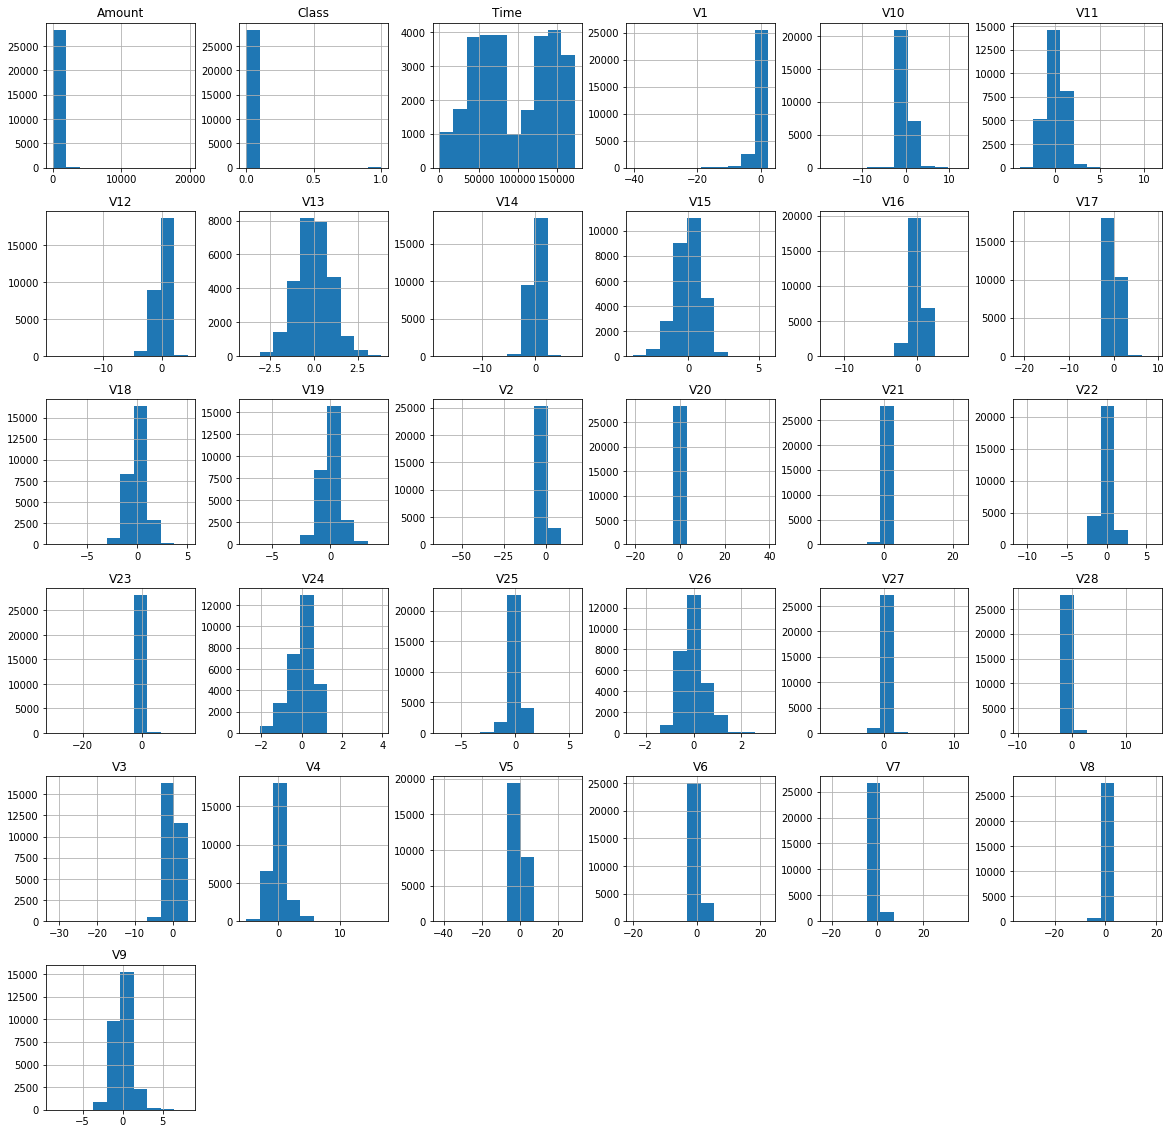

In [8]:
# plot histograms of each parameter
data.hist(figsize = (20,20))
plt.show()

In [9]:
# determine no. of fraud cases in the dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)

print('Fraud cases: {}'.format(len(fraud)))
print('Valid cases: {}'.format(len(valid)))

0.0017234102419808666
Fraud cases: 49
Valid cases: 28432


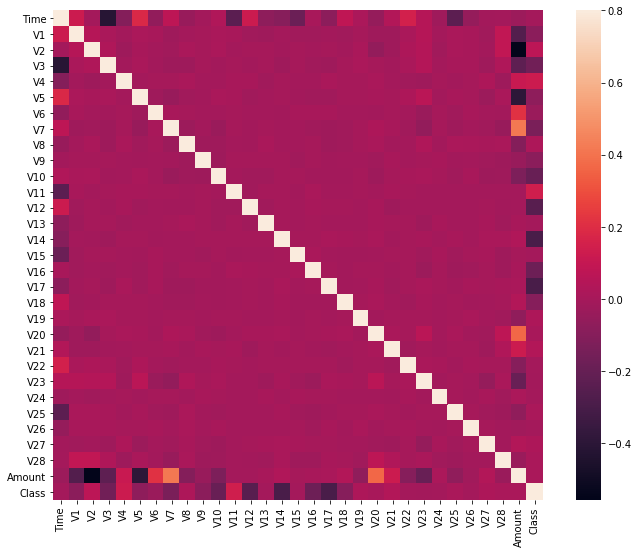

In [10]:
# correlation matrix
corr_matrix = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corr_matrix, vmax = .8, square = True)
plt.show()

In [12]:
# get all the columns from the dataframe
columns = data.columns.tolist()

# filter columns so as to remove the unwanted data
columns = [c for c in columns if c not in ["Class"]]

#store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

# print the shapes of X and Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [13]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define a random state
state = 1

#define the outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                       contamination=outlier_fraction,
                                       random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

In [15]:
# fit the model
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    # reshape the prediction values to 0 for valid, 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

